In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import os

#Merging all the months data into a single csv file
files = [file for file in os.listdir('./Sales_Data')]
df = pd.DataFrame()

# Iterate over each CSV file and append its data
for csv_file in files:
    
    file_path = os.path.join('./Sales_Data/', csv_file)
    try:
        # Explicitly specify encoding or handle errors gracefully
        data = pd.read_csv(file_path, encoding='utf-8')
        df = pd.concat([df, data], ignore_index=True)
    except Exception as e:
        print(f"Error reading {csv_file}: {e}")

df.to_csv('year_data.csv', index=False)
df = pd.read_csv('year_data.csv')


#Cleaning the data
df_copy = df.copy()
df_copy = df_copy.dropna()
df_copy = df_copy[df_copy['Order Date'].str[0:2] != 'Or']
df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'], format="%m/%d/%y %H:%M")
df_copy['Price Each'] = df_copy['Price Each'].astype(float)
df_copy['Quantity Ordered'] = df_copy['Quantity Ordered'].astype(int)

#Adding a month column and a total price column
df_copy['Month'] = df_copy['Order Date'].dt.month
df_copy['Total Price'] = df_copy['Price Each'] * df_copy['Quantity Ordered']

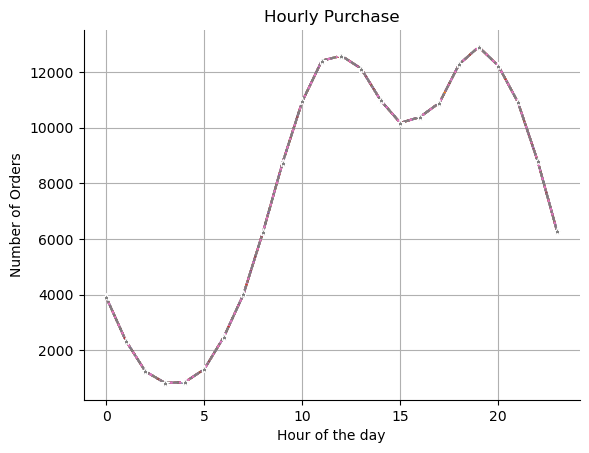

In [2]:
df_copy['Hour'] = df_copy['Order Date'].dt.hour
df_hourly_purchase = pd.DataFrame(df_copy.groupby('Hour').count())

#Plotting the data
sns.lineplot(data=df_hourly_purchase, marker='*', legend=False)
plt.xlabel('Hour of the day')
plt.grid()
plt.ylabel('Number of Orders')
plt.title('Hourly Purchase')
sns.despine()
plt.show()